In [219]:
import pandas as pd
import pandas.plotting as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sklearn
#from sklearn.model.selection import train_test_split
df=pd.read_csv(r'C:\Users\troit\OneDrive\Рабочий стол\Лобач\weatherAUS.csv') # Открытие датасета


# Предсказание дождя в Австралии

Указанный датасет демонстрирует статистические данные о погоде в Австралии. Цель задачи предсказать по некоторому набору погодных признаков в течении дня, предсказать будет ли завтра  дождь.

## Признаки


* _Date_ - Дата исследования
* _Location_ - Населённый пункт в котором проводились исследования
* _MinTemp_ - Минимальное значение температуры в градусах Цельсия
* _MaxTemp_ - Максимальное значение температуры воздуха в градусах Цельсия
* _Rainfall_ - Количество выпавших осадков в миллиметрах
* _Evaporation_ - Вличина, характеризующая испарение, (мм)
* _Sunshine_  - Количество часов яркого солнечного света в сутках
* _WindGustDir_ - Направление самого сильного порыва ветра за сутки до полуночи
* _WindGustSpeed_ - Наибольшая скорость ветра за сутки
* _WindDir9am_ - Направление ветра в 9 часов утра
* _WindDir3pm_ - Направление ветра в 3 часа вечера
* _WindSpeed9am_ - Скорость ветра в 9 часов утра 
* _WindSpeed3pm_ - Скорость ветра в 3 часа вечера
* _Humidity9am_ - Влажность воздуха в 9 часов утра
* _Humidity3am_ - Влажность воздуха в 3 часа вечера
* _Pressure9am_ - Атмосферное давление в 9 часов утра
* _Pressure3pm_ - Атмосферное давление в 3 часа вечера 
* _Cloud9am_ - Часть неба закрытая облаками в 9 часов вечера (количество восьмых частей от всего неба)
* _Cloud3pm_ - Часть неба закрытая облаками в 3 часа утра (количество восьмых частей от всего неба)
* _Temp9am_ - Температура воздуха в 9 часов утра
* _Temp3pm_ - Температура воздуха в 3 часа вечера
* _RainToday_ - Наличие/отсутствие дождя в день исследования
* _RainTomorrow_ - Наличие/отсутствие дождя в следующий день после исследования



In [220]:
d=df.shape
print(d)
print(df)

(145460, 23)
              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0    

In [221]:
print("Общее количество пропущенных значений")
print(df.isnull().sum().sum ()) #Общее количество пропущенных значений
count2=df.isnull().sum()["RainTomorrow"] #Количество пропущенных значений в классах
RT=df["RainTomorrow"]
count1=0
print("Квантили для признака MinTemp")
print(df["MinTemp"].quantile([0.005,.01,.02,.04,.08,.2,.5,.75]))
print("Квантили для признака Rainfall")
print(df["Rainfall"].quantile([0.005,.01,.02,.04,.08,.2,.5,.75]))
for i in range(len(RT)):  #поиск количества негативных классов
 if RT[i]=="No":
     count1+=1
print(count1)
procent=count1/(d[0]-count2)*100 #процент негативных классов
print(procent)

Общее количество пропущенных значений
343248
Квантили для признака MinTemp
0.005    -3.1
0.010    -1.9
0.020    -0.4
0.040     1.2
0.080     3.2
0.200     6.6
0.500    12.0
0.750    16.9
Name: MinTemp, dtype: float64
Квантили для признака Rainfall
0.005    0.0
0.010    0.0
0.020    0.0
0.040    0.0
0.080    0.0
0.200    0.0
0.500    0.0
0.750    0.8
Name: Rainfall, dtype: float64
110316
77.58187815152645


In [222]:
rows_to_drop=df[(df["MinTemp"]<df["MinTemp"].quantile(0.005)) | (df["MinTemp"]>df["MinTemp"].quantile(0.995))|
                (df["MaxTemp"]<df["MaxTemp"].quantile(0.005)) | (df["MaxTemp"]>df["MaxTemp"].quantile(0.995))|
                 (df["Rainfall"]<df["Rainfall"].quantile(0.01)) | (df["Rainfall"]>df["Rainfall"].quantile(0.99))|
                (df["Evaporation"]<df["Evaporation"].quantile(0.005)) | (df["Evaporation"]>df["Evaporation"].quantile(0.995))|
                 (df["Sunshine"]<df["Sunshine"].quantile(0.005)) | (df["Sunshine"]>df["Sunshine"].quantile(0.995))|
                 (df["WindGustSpeed"]<df["WindGustSpeed"].quantile(0.005)) | (df["WindGustSpeed"]>df["WindGustSpeed"].quantile(0.995))|
                 (df["WindSpeed9am"]<df["WindSpeed9am"].quantile(0.005)) | (df["WindSpeed9am"]>df["WindSpeed9am"].quantile(0.995))|
                 (df["WindSpeed3pm"]<df["WindSpeed3pm"].quantile(0.005)) | (df["WindSpeed3pm"]>df["WindSpeed3pm"].quantile(0.995))|
                 (df["Humidity9am"]<df["Humidity9am"].quantile(0.005)) | (df["Humidity9am"]>df["Humidity9am"].quantile(0.995))|
                 (df["Humidity3pm"]<df["Humidity3pm"].quantile(0.005)) | (df["Humidity3pm"]>df["Humidity3pm"].quantile(0.995))|
                 (df["Pressure9am"]<df["Pressure9am"].quantile(0.005)) | (df["Pressure9am"]>df["Pressure9am"].quantile(0.995))|
                 (df["Pressure3pm"]<df["Pressure3pm"].quantile(0.005)) | (df["Pressure3pm"]>df["Pressure3pm"].quantile(0.995))|
                 (df["Cloud9am"]<df["Cloud9am"].quantile(0.005)) | (df["Cloud9am"]>df["Cloud9am"].quantile(0.995))|
                 (df["Cloud3pm"]<df["Cloud3pm"].quantile(0.005)) | (df["Cloud3pm"]>df["Cloud3pm"].quantile(0.995))|
                 (df["Temp9am"]<df["Temp9am"].quantile(0.005)) | (df["Temp9am"]>df["Temp9am"].quantile(0.995))|
                 (df["Temp3pm"]<df["Temp3pm"].quantile(0.005)) | (df["Temp3pm"]>df["Temp3pm"].quantile(0.995))].index
data=df.drop(rows_to_drop)


In [223]:
print(data.shape)


(135957, 23)


array([[<AxesSubplot:xlabel='MinTemp', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Rainfall', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Evaporation', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Sunshine', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindGustSpeed', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindSpeed9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='WindSpeed3pm', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Humidity9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Humidity3pm', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Pressure9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Pressure3pm', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Cloud9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Cloud3pm', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Temp9am', ylabel='MinTemp'>,
        <AxesSubplot:xlabel='Temp3pm', ylabel='MinTemp'>],
       [<AxesSubplot:xlabel='Mi

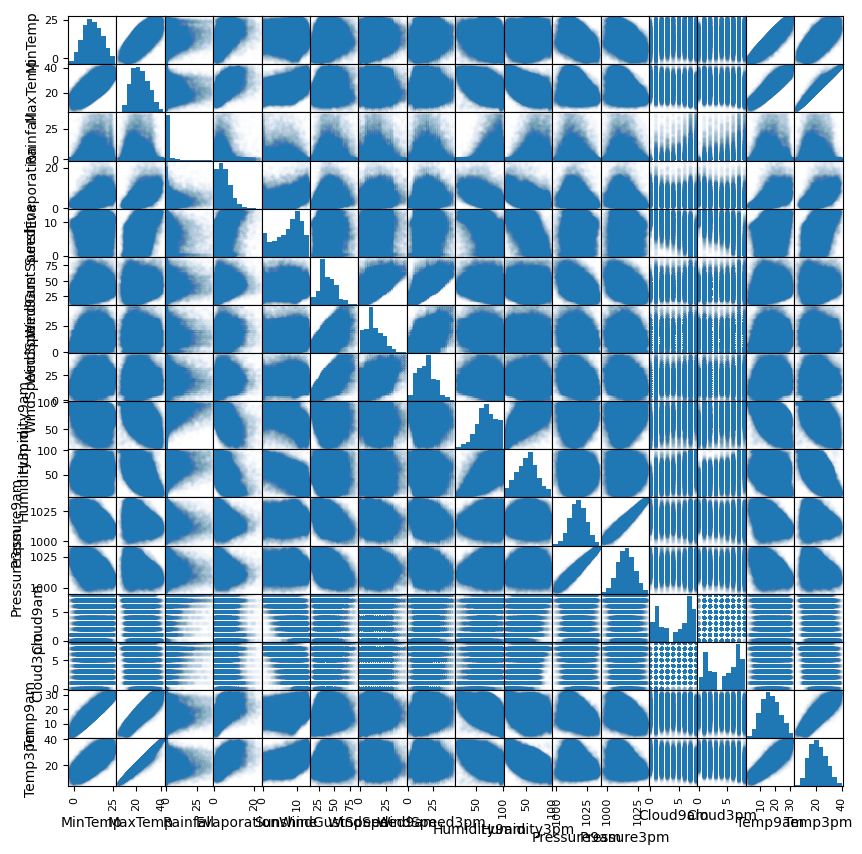

In [224]:
pdp.scatter_matrix(data, alpha = .01, figsize = (10, 10))


<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

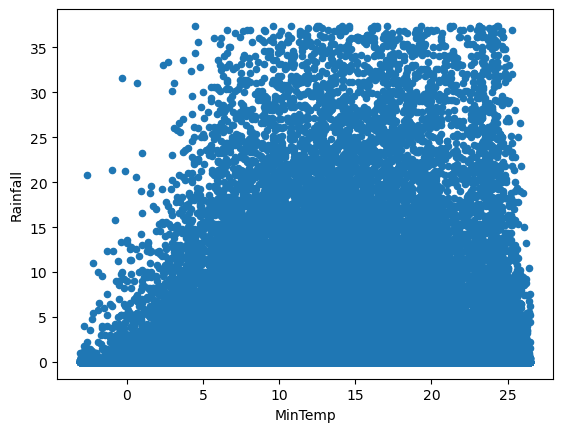

In [225]:
data.plot(kind="scatter", x="MinTemp",y="Rainfall")

<AxesSubplot:>

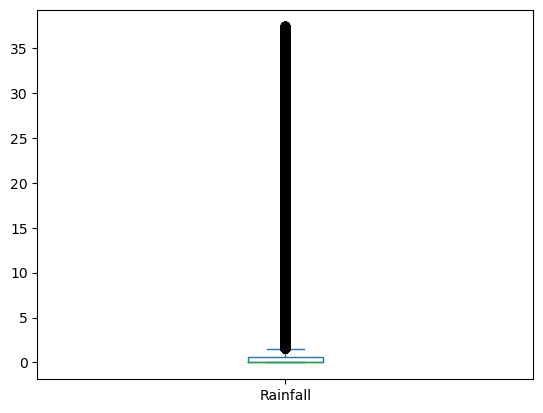

In [226]:
data["Rainfall"].plot(kind="box")

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

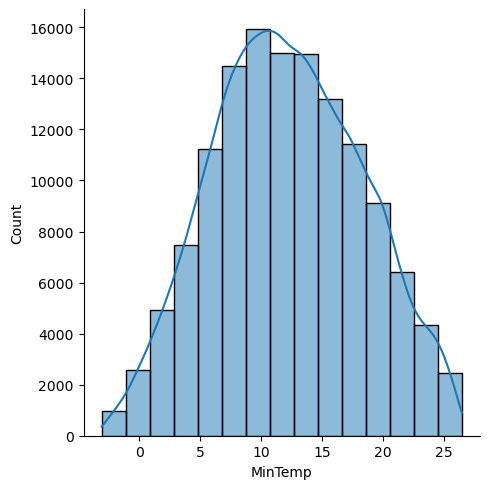

In [227]:
sns.displot(data["MinTemp"],bins=15,kde=True)
plt.grid

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

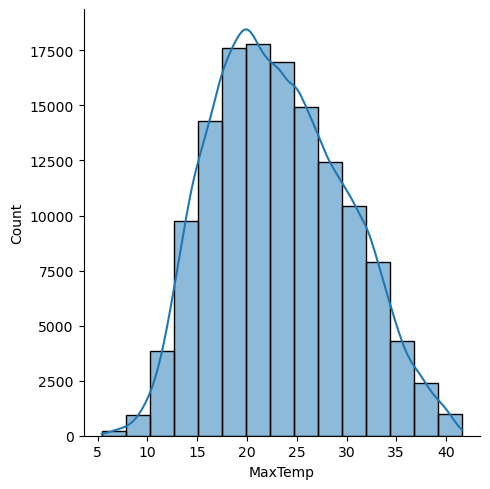

In [228]:
sns.displot(data["MaxTemp"],bins=15,kde=True)
plt.grid

In [229]:
corr_mat=data.corr()
print(corr_mat)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.718205  0.092096     0.514409  0.070910   
MaxTemp        0.718205  1.000000 -0.130241     0.635093  0.469108   
Rainfall       0.092096 -0.130241  1.000000    -0.117769 -0.247749   
Evaporation    0.514409  0.635093 -0.117769     1.000000  0.373733   
Sunshine       0.070910  0.469108 -0.247749     0.373733  1.000000   
WindGustSpeed  0.178679  0.070096  0.132083     0.217055 -0.020549   
WindSpeed9am   0.173957  0.007288  0.077171     0.200750  0.012492   
WindSpeed3pm   0.176594  0.046352  0.053271     0.149969  0.067394   
Humidity9am   -0.201173 -0.467794  0.271768    -0.527632 -0.479233   
Humidity3pm    0.052996 -0.478809  0.293157    -0.394871 -0.617983   
Pressure9am   -0.449341 -0.334879 -0.176493    -0.305646  0.031011   
Pressure3pm   -0.458035 -0.435085 -0.111392    -0.328751 -0.034342   
Cloud9am       0.084119 -0.281300  0.232201    -0.183276 -0.667112   
Cloud3pm       0.017

Большинство значений матрицы корреляции можно вполне логично объяснить. Любые температурные признаки очевидно коррелируют, поскольку все они зависят от времени года, причём понятно, что утром температура воздуха как правило ниже, чем в середине дня. Можно заключить, что атмосферное давление воздуха не сильно меняется в течении дня. Кроме того, в датасете есть признаки и с довольной высокой отрицательной корреляцией. Например, облачность и солнечность или влажность и солнечность

<AxesSubplot:>

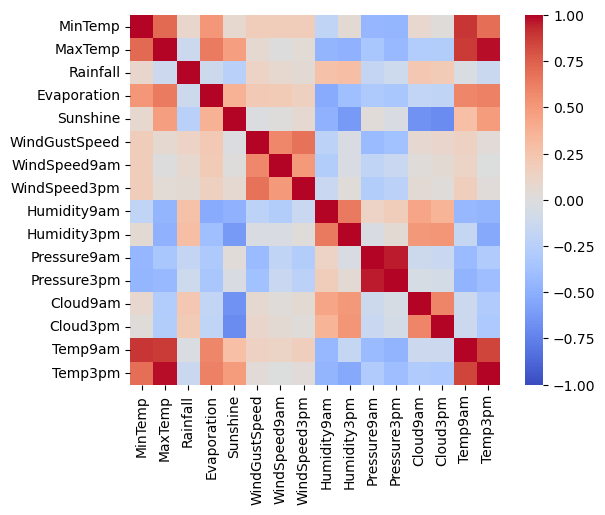

In [230]:
sns.heatmap(corr_mat, square=True,  fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm',linewidth=0.001)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

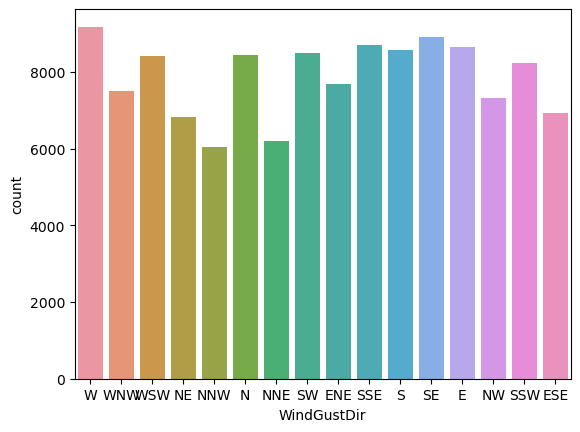

In [231]:
sns.countplot(x='WindGustDir',data=data)

In [232]:
data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,135957,135957,126128,126158,132032,132861,132884
unique,3433,49,16,16,16,2,2
top,2014-05-09,Sydney,W,N,SE,No,No
freq,49,3230,9177,10562,10344,104285,104330


In [233]:
'''data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)'''

"data_describe = data.describe(include = [object])\nbinary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]\nnonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]\nprint(binary_columns, nonbinary_columns)"

In [234]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1418
MaxTemp           1205
Rainfall          3096
Evaporation      58533
Sunshine         65136
WindGustDir       9829
WindGustSpeed     9768
WindDir9am        9799
WindDir3pm        3925
WindSpeed9am      1644
WindSpeed3pm      2887
Humidity9am       2361
Humidity3pm       4175
Pressure9am      13658
Pressure3pm      13617
Cloud9am         52083
Cloud3pm         55323
Temp9am           1572
Temp3pm           3321
RainToday         3096
RainTomorrow      3073
dtype: int64

Видно, что в датасете есть 4 признака, в которых процент пропущенных значений составляет более 30%. Логично будет исключить их из данных.

In [235]:

del data ["Evaporation"]
del data ["Sunshine"]
del data ["Cloud9am"]
del data ["Cloud3pm"]


In [236]:
data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,135957,135957,126128,126158,132032,132861,132884
unique,3433,49,16,16,16,2,2
top,2014-05-09,Sydney,W,N,SE,No,No
freq,49,3230,9177,10562,10344,104285,104330


 Признак 'Date'  имеет слишком много уникальных значений. При векторизации придётся добавить много новых столбцов в таблицу. Во избежание проблем с памятью исключим его из датасета

In [237]:
del data['Date']

In [238]:
data.isnull().sum()

Location             0
MinTemp           1418
MaxTemp           1205
Rainfall          3096
WindGustDir       9829
WindGustSpeed     9768
WindDir9am        9799
WindDir3pm        3925
WindSpeed9am      1644
WindSpeed3pm      2887
Humidity9am       2361
Humidity3pm       4175
Pressure9am      13658
Pressure3pm      13617
Temp9am           1572
Temp3pm           3321
RainToday         3096
RainTomorrow      3073
dtype: int64

In [239]:
#data.at[data["RainToday"] == 'No', "RainToday"] = 0
#data.at[data["RainToday"] == 'Yes', "RainToday"] = 1
print(data["RainToday"])

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainToday, Length: 135957, dtype: object


In [240]:
data["Location"].describe

<bound method NDFrame.describe of 0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 135957, dtype: object>

In [241]:
data.loc[data['Location'] == "Newcastle"].isnull().sum()


Location            0
MinTemp           339
MaxTemp           228
Rainfall           84
WindGustDir      2924
WindGustSpeed    2924
WindDir9am       1391
WindDir3pm       1281
WindSpeed9am      251
WindSpeed3pm      922
Humidity9am       237
Humidity3pm       911
Pressure9am      2924
Pressure3pm      2924
Temp9am           232
Temp3pm           905
RainToday          84
RainTomorrow       83
dtype: int64

In [242]:
data.loc[data['Location'] == "Penrith"].isnull().sum()

Location            0
MinTemp            28
MaxTemp            24
Rainfall           73
WindGustDir        65
WindGustSpeed      65
WindDir9am        506
WindDir3pm         63
WindSpeed9am       43
WindSpeed3pm       21
Humidity9am        91
Humidity3pm        66
Pressure9am      2885
Pressure3pm      2885
Temp9am            38
Temp3pm            20
RainToday          73
RainTomorrow       71
dtype: int64

In [243]:
data.loc[data['Location'] == "MountGinini"].isnull().sum()

Location            0
MinTemp            65
MaxTemp            45
Rainfall           75
WindGustDir       238
WindGustSpeed     238
WindDir9am        153
WindDir3pm        150
WindSpeed9am      145
WindSpeed3pm      145
Humidity9am       286
Humidity3pm       200
Pressure9am      2082
Pressure3pm      2082
Temp9am           271
Temp3pm           185
RainToday          75
RainTomorrow       77
dtype: int64

В указанных городах слишком много пропущенных значений, стоит исключить их из объекта исследования



In [244]:
data.loc[data['Location'] == "SalmonGums"].isnull().sum()

Location            0
MinTemp            41
MaxTemp            40
Rainfall           46
WindGustDir        84
WindGustSpeed      84
WindDir9am         99
WindDir3pm         78
WindSpeed9am       70
WindSpeed3pm       70
Humidity9am        36
Humidity3pm        36
Pressure9am      2945
Pressure3pm      2945
Temp9am            36
Temp3pm            36
RainToday          46
RainTomorrow       46
dtype: int64

В городе SalmonGums слишком много пустых значений лишь в двух признаках. 
Придётся искать компромисс между качеством (удалить эти два признака) 
и исключением одного объекта из исследования (удалить все значения связанные с городом).
Пока остановимся на втором варианте. Замечание: конечно можно было присвоить средние значения. Но в этом случае мы присвоим одинаковые значения в кокретном типе признака 'Location', что может привести к переобучению.

In [245]:
count=data.index [data['Location']== "Newcastle" ]. tolist ()
data=data.drop(index=count)
count=data.index [data['Location']== "Penrith" ]. tolist ()
data=data.drop(index=count)
count=data.index [data['Location']== "MountGinini" ]. tolist ()
data=data.drop(index=count)
count=data.index [data['Location']== "Albany" ]. tolist ()
data=data.drop(index=count)
count=data.index [data['Location']== "SalmonGums" ]. tolist ()
data=data.drop(index=count)

In [246]:
data.index [data['Location']== "Newcastle" ]. tolist ()
data.index [data['Location']== "Penrith" ]. tolist ()

[]

In [247]:
data.shape

(122208, 18)

In [248]:
data.median(axis = 0) 

C:\Users\troit\AppData\Local\Temp\ipykernel_13680\170149056.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median(axis = 0)


MinTemp            12.0
MaxTemp            22.9
Rainfall            0.0
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        69.0
Humidity3pm        52.0
Pressure9am      1017.8
Pressure3pm      1015.4
Temp9am            16.7
Temp3pm            21.3
dtype: float64

# Работаем с пропущенными значениями

In [249]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [a for a in data.columns if data[a].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)
data[categorical_columns].count(axis = 0)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


Location        122208
WindGustDir     118603
WindDir9am      114802
WindDir3pm      120605
RainToday       119414
RainTomorrow    119434
dtype: int64

In [250]:
data = data.fillna(data.median(axis = 0), axis = 0)

C:\Users\troit\AppData\Local\Temp\ipykernel_13680\2282753498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis = 0), axis = 0)


In [251]:
data[categorical_columns].count(axis = 0)

Location        122208
WindGustDir     118603
WindDir9am      114802
WindDir3pm      120605
RainToday       119414
RainTomorrow    119434
dtype: int64

In [252]:
data[numerical_columns].count(axis = 0)

MinTemp          122208
MaxTemp          122208
Rainfall         122208
WindGustSpeed    122208
WindSpeed9am     122208
WindSpeed3pm     122208
Humidity9am      122208
Humidity3pm      122208
Pressure9am      122208
Pressure3pm      122208
Temp9am          122208
Temp3pm          122208
dtype: int64

In [253]:
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].describe().top)
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].describe().top)
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].describe().top)
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].describe().top)
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].describe().top)

In [254]:
data[categorical_columns].count(axis = 0)

Location        122208
WindGustDir     122208
WindDir9am      122208
WindDir3pm      122208
RainToday       122208
RainTomorrow    122208
dtype: int64

# Проведём векторизацию

In [255]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [256]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [257]:
data[categorical_columns].count(axis = 0)

Location        122208
WindGustDir     122208
WindDir9am      122208
WindDir3pm      122208
RainToday       122208
RainTomorrow    122208
dtype: int64

In [258]:
data['WindGustDir'] = data['WindGustDir'].astype('category')
data['WindDir9am'] = data['WindDir9am'].astype('category')
data['WindDir3pm'] = data['WindDir3pm'].astype('category')
data['RainToday'] = data['RainToday'].astype('category')
data['RainTomorrow'] = data['RainTomorrow'].astype('category')
data['Location'] = data['Location'].astype('category')


In [259]:
data['RainToday'] = pd.factorize(data['RainToday'])[0]
data['RainTomorrow'] = pd.factorize(data['RainTomorrow'])[0]
#data['Date'] = pd.factorize(data['Date'])[0]
#data['WindDir9am'] = pd.factorize(data['WindDir9am'])[0]
#data['Location'] = pd.factorize(data['WindDir9am'])[0]
#data['WindDir3pm'] = pd.factorize(data['WindDir9am'])[0]
#data['WindGustDir'] = pd.factorize(data['WindDir9am'])[0]

In [260]:
data['RainToday'].describe()

count    122208.00000
mean          0.20979
std           0.40716
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: RainToday, dtype: float64

In [261]:
data.describe(include=['category'])

,Location,WindGustDir,WindDir9am,WindDir3pm
count,122208,122208,122208,122208
unique,44,16,16,16
top,Sydney,W,N,SE
freq,3230,12206,17000,10462


In [262]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [263]:
data['Location']

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 122208, dtype: category
Categories (44, object): ['Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek', ..., 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']

In [264]:
data_nonbinary=data[nonbinary_columns]
data_nonbinary

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW
145458,Uluru,SE,SSE,N


In [265]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data_nonbinary[['WindGustDir', 'WindDir9am', 'WindDir3pm','Location']])
data_v = pd.DataFrame(enc.transform(data_nonbinary[['WindGustDir', 'WindDir9am', 'WindDir3pm','Location']]),
                       columns=enc.get_feature_names_out(), index=data_nonbinary.index)

In [266]:
data_v

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Нормализация

In [267]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000,122208.000000
mean,12.279361,23.332294,1.665278,39.449062,14.049817,18.824160,68.796519,51.191109,1017.880171,1015.470449,17.049087,21.782803
std,6.155496,6.663570,4.609750,12.301206,8.345840,8.213807,17.934585,19.732983,6.575521,6.517771,6.154306,6.463083
min,-3.100000,5.500000,0.000000,13.000000,0.000000,0.000000,14.000000,7.000000,997.500000,996.100000,0.900000,4.600000
25%,7.800000,18.200000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,12.400000,16.900000
50%,12.000000,22.900000,0.000000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.800000,1015.400000,16.700000,21.300000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,82.000000,65.000000,1022.300000,1019.900000,21.500000,26.300000
max,26.500000,41.600000,37.400000,87.000000,44.000000,46.000000,100.000000,99.000000,1035.500000,1033.000000,32.400000,39.900000


In [268]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [269]:
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05,1.222080e+05
mean,2.164537e-14,8.810474e-14,-1.619163e-14,-1.659618e-15,-3.188182e-15,2.409858e-15,1.660931e-14,-6.197043e-15,6.608831e-12,-1.179450e-11,7.193815e-15,1.941673e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.498476e+00,-2.676087e+00,-3.612513e-01,-2.150119e+00,-1.683451e+00,-2.291770e+00,-3.055355e+00,-2.239454e+00,-3.099400e+00,-2.971944e+00,-2.624030e+00,-2.658608e+00
25%,-7.277010e-01,-7.702019e-01,-3.612513e-01,-6.868483e-01,-8.447102e-01,-7.090695e-01,-6.577525e-01,-7.191568e-01,-6.813408e-01,-7.012289e-01,-7.554201e-01,-7.554914e-01
50%,-4.538393e-02,-6.487425e-02,-3.612513e-01,-3.650555e-02,-1.257892e-01,2.140780e-02,1.134573e-02,4.099184e-02,-1.219230e-02,-1.080883e-02,-5.672236e-02,-7.470167e-02
75%,7.344070e-01,7.304952e-01,-2.310924e-01,5.325443e-01,5.931318e-01,6.301389e-01,7.362022e-01,6.997873e-01,6.721641e-01,6.796113e-01,7.232193e-01,6.989230e-01
max,2.310234e+00,2.741429e+00,7.751987e+00,3.865551e+00,3.588636e+00,3.308556e+00,1.739850e+00,2.422791e+00,2.679610e+00,2.689501e+00,2.494337e+00,2.803182e+00


In [270]:
data[binary_columns]

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [271]:
data=pd.concat((data_numerical, data_v, data[binary_columns]), axis = 1)

# Прогоняем данные по алгоритмам

In [272]:
X=data.drop('RainToday', axis=1)

In [273]:
y = data['RainToday']
feature_names = X.columns

In [274]:
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm',
       ...
       'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga',
       'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Witchcliffe', 'Location_Wollongong', 'Location_Woomera',
       'RainTomorrow'],
      dtype='object', length=105)

In [275]:
X = X.to_numpy()
y = np.array(y != 0, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

85545 36663


In [277]:
X_train


array([[ 0.32826587,  0.65546037, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91310904,  0.55041157, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43527937,  1.2107183 , -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.06885947, -1.62559927, -0.31786498, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08458122, -0.60512522,  1.2006556 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.89015739,  0.62544642, -0.36125129, ...,  0.        ,
         0.        ,  0.        ]])

In [278]:
X

array([[ 0.18205508, -0.06487425, -0.23109238, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79268353,  0.26527911, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10082686,  0.35532094, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.1175964 ,  0.5354046 , -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72770095,  0.55041157, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42573973, -0.06487425, -0.36125129, ...,  0.        ,
         0.        ,  0.        ]])

In [279]:
X_test

array([[-0.1103665 , -0.07988123, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08510511, -0.54509733, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55570488,  1.15069042, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.9786155 , -1.74565504, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97809161,  0.38533488, -0.36125129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44198538,  1.24073224,  2.19854055, ...,  0.        ,
         0.        ,  0.        ]])

In [280]:
X.shape

(122208, 105)

## Метод ближайших соседей

In [281]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [282]:
knn

KNeighborsClassifier(n_neighbors=10)

In [283]:
y_test_predict = knn.predict(X_test)
#err_test  = np.mean(y_test  != y_test_predict)


C:\Users\troit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [284]:
err_count=np.mean(y_test  != y_test_predict)

In [285]:
print(err_count)

0.09906445189973542

In [286]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[28749   193]
 [ 3439  4282]]


## SVC

In [287]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.007691858086387281 0.008755420996645119


## Random Forest

In [288]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.00010910181927283638
